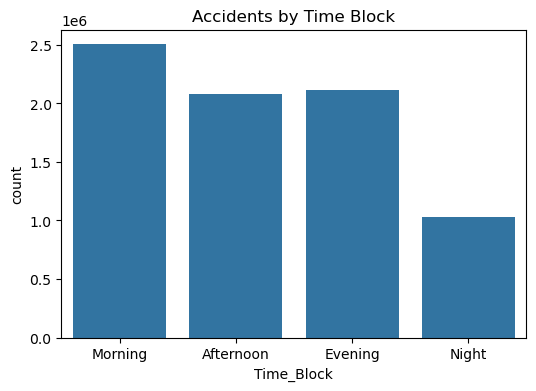

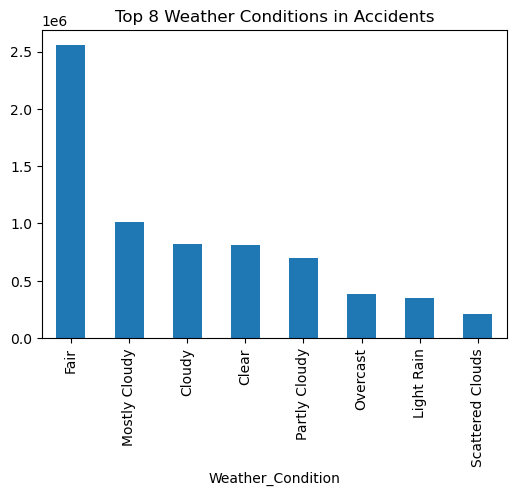

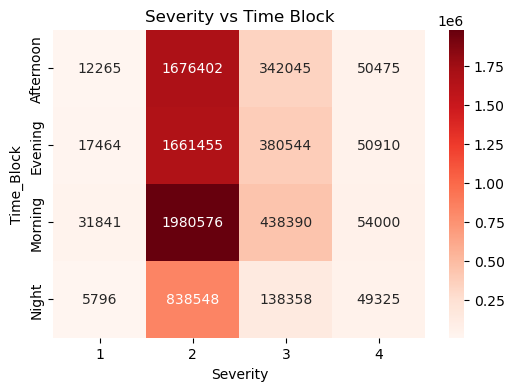

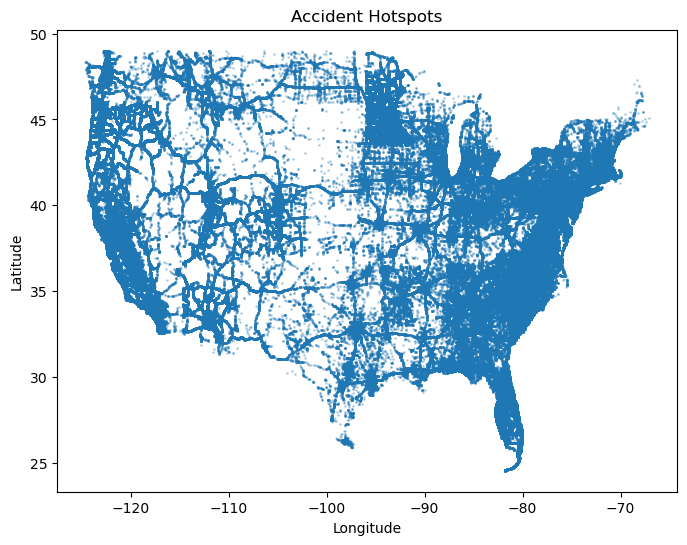

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Bhavana B V\OneDrive\Documents\SKILLS\US_Accidents_March23.csv")

df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

df['Hour'] = df['Start_Time'].dt.hour

def time_block(hour):
    if 5 <= hour < 11:
        return "Morning"
    elif 11 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['Time_Block'] = df['Hour'].apply(time_block)

plt.figure(figsize=(6,4))
sns.countplot(x='Time_Block', data=df, order=["Morning","Afternoon","Evening","Night"])
plt.title("Accidents by Time Block")
plt.show()

top_weather = df['Weather_Condition'].value_counts().head(8)
plt.figure(figsize=(6,4))
top_weather.plot(kind='bar')
plt.title("Top 8 Weather Conditions in Accidents")
plt.show()

pivot = pd.crosstab(df['Time_Block'], df['Severity'])
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt="d", cmap="Reds")
plt.title("Severity vs Time Block")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df['Start_Lng'], df['Start_Lat'], alpha=0.25, s=1)
plt.title("Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()